In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PolynomialFeatures
import datetime 
import pytz
from pytz import timezone
import tarfile
from numpy import load
import os
from sklearn.manifold import TSNE
import h5py
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from scipy import spatial

# HDF5

In [2]:
h5 = h5py.File('sound_data_improved.hdf5', 'r')

In [3]:
d = h5['sound_data']

In [4]:
# with h5py.File('sound_data_dt.hdf5', 'w') as h5:
#     d_dt = h5.create_dataset('sound_data',
#                           (3388858,),
#                           dtype=[('timestamp', ''),
#                                  ('sensor_id', 'S128'),
#                                  ('feature_vector', 'f4', (512,))
#                                 ],
#                             chunks=True,
#                             maxshape=(3388858 * 514,))
# #     print(d[0])
#     for idx in range(sensor_data.shape[0]):
#         d[idx] = (sensor_timestamps[idx], sensor_id[idx], sensor_data[idx])

In [5]:
#d['feature_vector'][1]

In [6]:
d_sample = []
#d_sample.append(np.random.choice(d['feature_vector'], 100000, replace = False))
sample_nums = np.random.choice(range(3388858), 10000, replace = False)

In [7]:
index = np.zeros(d.shape[0]).astype('bool')
index[sample_nums] = True

In [8]:
d[index, 'feature_vector'].shape

(10000, 512)

In [9]:
# d['feature_vector'].shape
# d['feature_vector'][0]
# for num in sample_nums:
#     d_sample.append(d['feature_vector'][num])

# PCA and TSNE on 10,000 sample

In [11]:
pca = sklearnPCA()
fitted = pca.fit(d[index,'feature_vector'])

In [12]:
fitted.explained_variance_ratio_

array([3.82800937e-01, 8.18836838e-02, 5.27845100e-02, 4.47936952e-02,
       4.04915586e-02, 3.23738605e-02, 2.26250309e-02, 1.71102677e-02,
       1.50897475e-02, 1.17771514e-02, 1.06354943e-02, 9.49227624e-03,
       8.28600209e-03, 8.09463114e-03, 7.15493876e-03, 5.67789515e-03,
       5.49874920e-03, 4.79729660e-03, 4.73645888e-03, 4.36752243e-03,
       4.13336698e-03, 3.82498885e-03, 3.65046598e-03, 3.43066733e-03,
       3.36845266e-03, 2.99929804e-03, 2.84961378e-03, 2.73029506e-03,
       2.66307755e-03, 2.54492322e-03, 2.45823711e-03, 2.35920819e-03,
       2.21993541e-03, 2.18982017e-03, 2.10320158e-03, 2.00955849e-03,
       1.96951092e-03, 1.89585180e-03, 1.78705284e-03, 1.76327315e-03,
       1.67989766e-03, 1.62759027e-03, 1.58345117e-03, 1.55859790e-03,
       1.54369010e-03, 1.50035089e-03, 1.44214497e-03, 1.41235394e-03,
       1.39520108e-03, 1.37132197e-03, 1.33441749e-03, 1.31351326e-03,
       1.26072625e-03, 1.23536831e-03, 1.22244423e-03, 1.19292026e-03,
      

In [13]:
pca.fit_transform(d[index, 'feature_vector'])

array([[-3.5990167e+00, -6.9130957e-01, -2.1377316e+00, ...,
        -6.7926995e-02, -1.0535224e-02, -5.1168784e-02],
       [ 1.9021017e+01, -9.8034394e-01, -1.0185537e+00, ...,
         4.5586459e-02,  9.1035195e-02, -5.3691261e-02],
       [-3.0778015e+00, -1.8063978e+00,  2.3150737e+00, ...,
        -4.5413189e-02, -9.5530793e-02, -4.7590863e-02],
       ...,
       [-2.0924647e+00,  6.0423555e+00,  2.6367755e+00, ...,
         1.9194886e-02, -4.3740079e-02,  6.4842793e-04],
       [-1.2121741e+00,  2.6652935e+00,  7.3808156e-02, ...,
         2.5468936e-02,  8.6840339e-02,  9.8976344e-02],
       [ 1.8903753e+01, -1.2782060e-01,  8.2322234e-01, ...,
         1.1371243e-01, -1.3131113e-02, -8.3616287e-02]], dtype=float32)

In [14]:
transformed = pca.fit_transform(d['feature_vector'])

In [15]:
print("original shape:   ", d[index, 'feature_vector'].shape)
print("transformed shape:", transformed.shape)

original shape:    (10000, 512)
transformed shape: (3388858, 512)


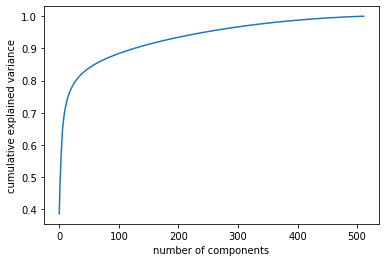

In [16]:
plt.plot(np.cumsum(fitted.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
#45 for o.85, 106 for 0.9

In [17]:
pca_106 = sklearnPCA(106)  # project from 64 to 2 dimensions
projected = pca_106.fit_transform(d['feature_vector'])

In [18]:
print(d['feature_vector'].shape)
print(projected.shape)

(3388858, 512)
(3388858, 106)


In [19]:
projected[index].shape

(10000, 106)

In [20]:
projected_tsne = TSNE(n_components=2).fit_transform(projected[index])

In [21]:
projected_tsne[:, 0].shape

(10000,)

# Birch Clusters on Small Sample

In [22]:
# for n_clusters in range(5, 21):
#     birch = Birch(n_clusters=n_clusters)
#     birch_clusters = birch.fit_predict(projected_tsne)
#     plt.scatter(projected_tsne[:, 0], projected_tsne[:, 1], c=birch_clusters, s = 1)
#     subplot_num += 1
#     plt.show()
#     silhouette_score = metrics.silhouette_score(projected_tsne, birch.labels_, metric='euclidean')
#     c_h_score = metrics.calinski_harabasz_score(projected_tsne, birch.labels_)
#     d_b_score = davies_bouldin_score(projected_tsne, birch.labels_) 
#     plt.title('n_clusters = ' + str(n_clusters) + ', silhouette score = ' + str(silhouette_score) \
#              + ', calinski harabasz score = ' + str(c_h_score) \
#              + ', davies bouldin score = ' + str(d_b_score))

Plot 1: n_clusters = 5, silhouette score = 0.117224, calinski harabasz score = 2892.77276613567, davies bouldin score = 1.9813898992332035
Plot 2: n_clusters = 6, silhouette score = 0.13167891, calinski harabasz score = 2538.296154074191, davies bouldin score = 2.173031967226198
Plot 3: n_clusters = 7, silhouette score = 0.13719782, calinski harabasz score = 2276.00976933874, davies bouldin score = 2.2357355326359922
Plot 4: n_clusters = 8, silhouette score = 0.1355632, calinski harabasz score = 2040.95900258511, davies bouldin score = 2.2814997878049628
Plot 5: n_clusters = 9, silhouette score = 0.14031324, calinski harabasz score = 1854.2967202370066, davies bouldin score = 2.27259064342526
Plot 6: n_clusters = 10, silhouette score = 0.110745944, calinski harabasz score = 1698.6861770911107, davies bouldin score = 2.3343360395099775
Plot 7: n_clusters = 11, silhouette score = 0.11344631, calinski harabasz score = 1571.7324106078597, davies bouldin score = 2.4123147685795816
Plot 8: n

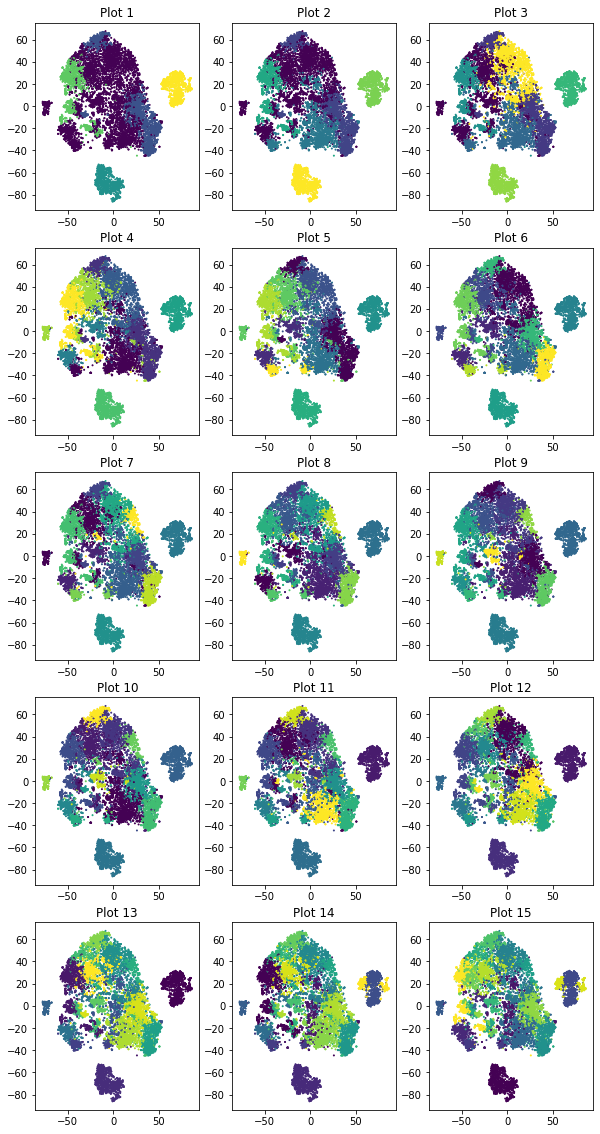

In [24]:
plt.figure(figsize=(10, 20))
idx = 1
for num_clusters in range(5, 20):
    birch = Birch(n_clusters=num_clusters)
    birch_clusters = birch.fit_predict(projected[index])
    plt.subplot(5, 3, idx)
    plt.scatter(projected_tsne[:, 0], projected_tsne[:, 1], c=birch_clusters, s = 1)
    plt.title('Plot ' + str(idx))
    silhouette_score = metrics.silhouette_score(projected[index], birch.labels_, metric='euclidean')
    c_h_score = metrics.calinski_harabasz_score(projected[index], birch.labels_)
    d_b_score = davies_bouldin_score(projected[index], birch.labels_) 
    print('Plot ' + str(idx) + ': n_clusters = ' + str(num_clusters) + ', silhouette score = ' + str(silhouette_score) \
             + ', calinski harabasz score = ' + str(c_h_score) \
             + ', davies bouldin score = ' + str(d_b_score))
    idx += 1
plt.show()

In [32]:
#8 clusters seem to be good
birch = Birch(n_clusters=8)
birch_clusters = birch.fit_predict(projected[index])
birch.subcluster_centers_

array([[ 1.79425087e+01, -2.03126907e+00,  1.88478625e+00, ...,
         6.41784489e-01,  1.30241290e-01,  9.41236556e-01],
       [ 1.97437191e+01, -8.69393945e-01,  2.79262334e-01, ...,
        -9.31931436e-02,  6.96819723e-02,  2.02479690e-01],
       [ 1.85645332e+01, -4.52743560e-01, -1.50524676e-01, ...,
         3.70859295e-01, -4.28821743e-01,  5.71348250e-01],
       ...,
       [ 6.09873533e+00, -8.00139546e-01,  2.45143104e+00, ...,
        -3.70311141e-01, -1.64908525e-02,  1.34370951e-02],
       [ 7.08244467e+00,  5.79475641e-01,  3.19178939e+00, ...,
         4.59234983e-01, -7.60525391e-02,  1.29558101e-01],
       [ 7.19163227e+00,  1.14005232e+00,  3.84734130e+00, ...,
         5.17814338e-01, -3.07914883e-01,  1.09588951e-01]])

# Nearest Neighbors and Corresponding Audio Files

In [33]:
tree = spatial.KDTree(projected[index])

In [34]:
birch.subcluster_centers_.shape

(10000, 106)

In [35]:
# tree.query(birch.subcluster_centers_, 5)